In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import pprintpp
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 

In [2]:
iris = datasets.load_iris()
iris_Feature_vectors = iris.data
iris_Class_labels = iris.target
Class_Label_names = iris.target_names
Description = iris.DESCR
Feature_Names = iris.feature_names

# print(iris_Data.size)
# print(iris_Data)
# print(Description)

In [3]:

Sample_dict = {
     1 : np.array([5.2,2.7,3.3,0.6]),
     2 : np.array([5.1,2.3,6.3,1.6]),
     3 : np.array([7.9,2.2,3.4,1.2]),
     4 : np.array([6.0,3.8,3.3,0.3]),
     5 : np.array([5.2,3.5,4.9,1.0])
}


pprintpp.pprint(Sample_dict)


pca = PCA(n_components=2)
pca.fit(iris_Feature_vectors)
X_new = pca.transform(iris_Feature_vectors)

#print("Optimised Feature Vector")
#print(X_new)

# print()
# print(f"PCA components : {pca.components_}")
# print()
# print(f"PCA components Explained : {pca.explained_variance_}")
# print()
# print(f"Percentage of variance explained : {pca.explained_variance_ratio_}")
# print()
# print(f"Singular Values : {pca.singular_values_}")
# print()
# print(f" The estimated number of components : {pca.n_components_}")
# print()
# print(f" mean : {pca.mean_}")
# print()
# print(f" number of features : {pca.n_features_}")
# print()
# print(f" number of samples : {pca.n_samples_}")
# print()

{
    1: array([5.2, 2.7, 3.3, 0.6]),
    2: array([5.1, 2.3, 6.3, 1.6]),
    3: array([7.9, 2.2, 3.4, 1.2]),
    4: array([6. , 3.8, 3.3, 0.3]),
    5: array([5.2, 3.5, 4.9, 1. ]),
}


Text(0.5, 1.0, 'PCA of IRIS dataset')

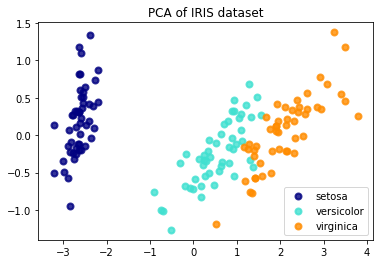

In [4]:
import matplotlib.pyplot as plt

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, Class_Label_name in zip(colors, [0, 1, 2], Class_Label_names):
    plt.scatter(X_new[iris_Class_labels == i, 0], X_new[iris_Class_labels == i, 1], color=color, alpha=.8, lw=lw,
                label=Class_Label_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')


In [5]:
New_Samples = np.array([
    [5.2,2.7,3.3,0.6],
    [5.1,2.3,6.3,1.6],
    [7.9,2.2,3.4,1.2],
    [6.0,3.8,3.3,0.3],
    [5.2,3.5,4.9,1.0],
])

# fit the PCA new samples

NewPCASamples = pca.transform(New_Samples)
print(np.round(NewPCASamples,4))

[[-0.8094 -0.5587]
 [ 2.1166 -1.512 ]
 [ 0.5093  0.7864]
 [-0.7207  0.7924]
 [ 0.637  -0.2821]]


In [6]:
from sklearn.decomposition import sparse_encode

numNonZero = 2
tolerance =  0.00001
# y = sparse_encode(x,V,algorithm='omp', n_nonzero_coefs=numNonZero, alpha=tolerance)


In [38]:
iris_Feature_vectors = iris.data
iris_Class_labels = iris.target
Dict = {}
empty1 = np.empty((0,4))
empty2 = np.empty((0,4))
empty3 = np.empty((0,4))
Sample_Features = np.array([
    [7.0,2.2,2.4,2.1],
    [6.5,2.1,2.1,1.2],
    [7.1,2.7,1.8,0.8],
    [6.8,2.4,5.0,0.6],
    [5.2,3.8,3.8,1.3],
])


for (iris_Feature_vector, iris_Class_label) in zip(iris_Feature_vectors, iris_Class_labels):
    #print(f"{iris_Feature_vector} : {iris_Class_label}")
    if(iris_Class_label == 0):
        #print(iris_Feature_vector)
        empty1 = np.vstack((empty1,iris_Feature_vector))
        Dict[iris_Class_label] = empty1
    
    if(iris_Class_label == 1):
        #print(iris_Feature_vector)
        empty2 = np.vstack((empty2,iris_Feature_vector))
        Dict[iris_Class_label] = empty2
    
    if(iris_Class_label == 2):
        #print(iris_Feature_vector)
        empty3 = np.vstack((empty3,iris_Feature_vector))
        Dict[iris_Class_label] = empty3

def Cost(Sample_Features, Dict, algorithm='omp',numNonZero = 2, alpha=1.000000e-05, lambdaVal = 0.1):
    y=sparse_encode(Sample_Features.reshape(1,-1),Dict,algorithm=algorithm,n_nonzero_coefs=numNonZero,alpha=alpha)
    Dict_transpose = np.transpose(Dict)
    y_transpose = np.transpose(y)
    product = Dict_transpose @ y_transpose
    #print(product)
    y_l0norm = len(np.nonzero(y_transpose))
    Distribution = Sample_Features.reshape(-1,1) - product
    #print(Distribution)
    cost = np.linalg.norm(Distribution) + (y_l0norm * lambdaVal )
    return cost

for i in Dict:
    if(i == 0):
        print()
        print("Class 0 costs")
        print()
    if(i == 1):
        print()
        print("Class 1 costs")
        print()
    if(i == 2):
        print()
        print("Class 2 costs")
        print()
    for j in Sample_Features:
        #print(Dict[i])
        cost = Cost(j, Dict[i])
        print(cost)





Class 0 costs

1.8606985206664153
0.9859218583112266
0.6722430772383607
2.964326260657498
1.6882164133249593

Class 1 costs

1.9321915009901462
1.2938584382215828
0.9402589076066523
0.8852887852817131
0.87381131538452

Class 2 costs

1.9647131218340914
2.0173847823124698
2.172060616090261
0.7739621151467602
0.5731779435778965
